In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl


sns.set_style("ticks")

%matplotlib inline

In [3]:
# build arrays with raw data first.
# mask, normalize and play with means later on.

def wrangle_data(in_lines):
    data = np.zeros((8,12,37))
    block = []
    block_counter = 0
    for line in in_lines:
        line = line.strip()
        line = line.split('\t')
        if line == ['']:
            block = np.array(block, dtype=float)
            
            block_data = block[:,:]
            data[:,:,block_counter] = block_data
            block = []
            block_counter +=1
        else:    
            block.append(line)
    return data

def format_figure(ax):
    '''Standard format to apply to all plots'''
    sizer = 14
    title_size = 18#sizer * 1.5
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(sizer)
    for item in [ax.title, ax.xaxis.label, ax.yaxis.label]:
        item.set_fontsize(title_size)    
    
    plt.setp(ax.spines.values(), linewidth=2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    
    return ax

def format_legend(legend):
    for label in legend.get_texts():
        label.set_fontsize(14)

    for label in legend.get_lines():
        label.set_linewidth(2)  # the legend line width
        
    return legend
        


sns.set_style("ticks")

In [19]:
infile = open('/home/mark/data/drug_assays/2015/aug15/L1_acr_alpha_ALN_21aug.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]

ZZ26_data = np.zeros((8,2,36))
ZZ26_data[:,:2,:] = data[:,:2,:]

N2_data = np.zeros((8,2,36))
N2_data[:,:2,:] = data[:,2:4,:]

ZZ15_data = np.zeros((8,2,36))
ZZ15_data[:,:2,:] = data[:,4:6,:]

CB211_data = np.zeros((8,2,36))
CB211_data[:,:2,:] = data[:,6:8,:]

RB918_data = np.zeros((8,2,36))
RB918_data[:,:2,:] = data[:,10:,:]

# Fix this mean! Need mean of rows 6 and 7 over two columns each
N2_norm = N2_data[:,:,:].mean(axis=1)/N2_data[6,:,:].mean(axis=0)
ZZ26_norm = ZZ26_data[:,:,:].mean(axis=1)/ZZ26_data[6,:,:].mean(axis=0)
ZZ15_norm = ZZ15_data[:,:,:].mean(axis=1)/ZZ15_data[6,:,:].mean(axis=0)
CB211_norm = CB211_data[:,:,:].mean(axis=1)/CB211_data[6,:,:].mean(axis=0)
RB918_norm = RB918_data[:,:,:].mean(axis=1)/RB918_data[6,:,:].mean(axis=0)





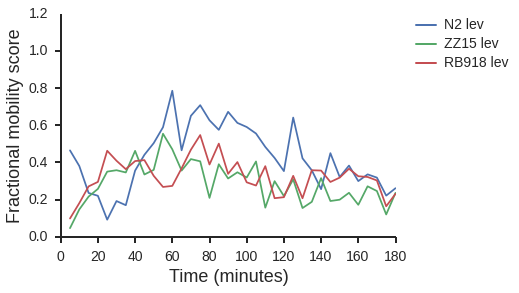

In [20]:
times = range(5,185,5)
#labels = [ 'N2 lev','ZZ26 lev', 'CB211 lev']
labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
strains = [N2_norm, ZZ26_norm,CB211_norm]
#strains = [N2_norm, ZZ15_norm, RB918_norm]
ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=100)
for i, strain in enumerate(strains):
    ax.plot(times, strain[0,:], label = labels[i])

   
#ax.axis([0,120,0,1.2])
ax = format_figure(ax)
ax.set_xlim([0, 180])
ax.set_ylim([0, 1.2])
    
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
leg = format_legend(leg)
sns.despine()   
plt.show()

# acr-16, unc-63, Levamisole, 3/Sep

In [6]:
infile = open('/home/mark/data/drug_assays/2015/sep15/acr16_unc63_lev_3sep.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]


N2_lev_data = data[:,:4,:]
A_lev_data = data[:,4:8,:]
B_lev_data = data[:,8:12,:]

N2_lev_norm = N2_lev_data[:,:,:].mean(axis=1)/N2_lev_data[7,:,:].mean(axis=0)
A_lev_norm = A_lev_data[:,:,:].mean(axis=1)/A_lev_data[7,:,:].mean(axis=0)
B_lev_norm = B_lev_data[:,:,:].mean(axis=1)/B_lev_data[7,:,:].mean(axis=0)

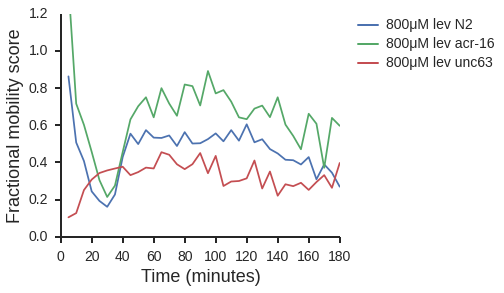

In [15]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['800', '600', '400','200','100','50', '25']

for i in [0]:#,1,2,3,4,5]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
    ax.plot(times, N2_lev_norm[i,:], label = labels[i] + u'μM lev N2')
    ax.plot(times, A_lev_norm[i,:], label = labels[i] + u'μM lev acr-16')
    ax.plot(times, B_lev_norm[i,:], label = labels[i] + u'μM lev unc63')

   

    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()
    


#acr-16, unc-63 levamisole, 7th sep

In [16]:
infile = open('/home/mark/data/drug_assays/2015/sep15/L1_acr16_unc63_lev_7sep.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]


N2_lev_data = data[:,:4,:]
A_lev_data = data[:,4:8,:]
B_lev_data = data[:,8:12,:]

N2_lev_norm = N2_lev_data[:,:,:].mean(axis=1)/N2_lev_data[7,:,:].mean(axis=0)
A_lev_norm = A_lev_data[:,:,:].mean(axis=1)/A_lev_data[7,:,:].mean(axis=0)
B_lev_norm = B_lev_data[:,:,:].mean(axis=1)/B_lev_data[7,:,:].mean(axis=0)

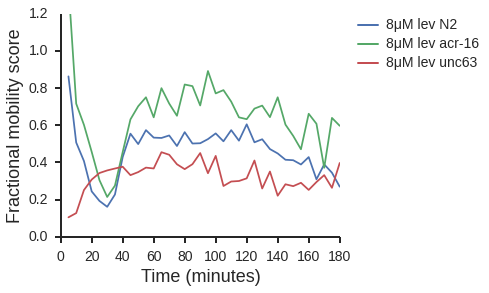

In [17]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['8', '4', '3','2','1','0.5', '0.25']

for i in [0]:#,1,2,3,4,5]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
    ax.plot(times, N2_lev_norm[i,:], label = labels[i] + u'μM lev N2')
    ax.plot(times, A_lev_norm[i,:], label = labels[i] + u'μM lev acr-16')
    ax.plot(times, B_lev_norm[i,:], label = labels[i] + u'μM lev unc63')

   

    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()

In [18]:
infile = open('/home/mark/data/drug_assays/2015/sep15/L1_lev1_lev8_lev_7aug.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]


N2_lev_data = data[:,:4,:]
A_lev_data = data[:,4:8,:]
B_lev_data = data[:,8:12,:]

N2_lev_norm = N2_lev_data[:,:,:].mean(axis=1)/N2_lev_data[7,:,:].mean(axis=0)
A_lev_norm = A_lev_data[:,:,:].mean(axis=1)/A_lev_data[7,:,:].mean(axis=0)
B_lev_norm = B_lev_data[:,:,:].mean(axis=1)/B_lev_data[7,:,:].mean(axis=0)

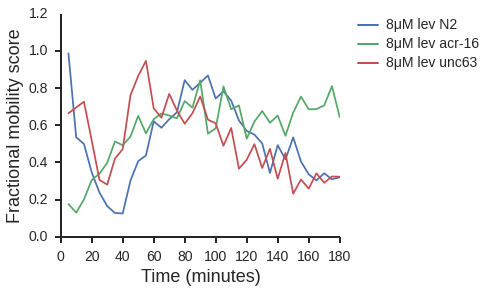

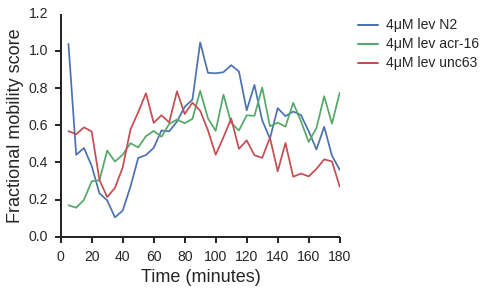

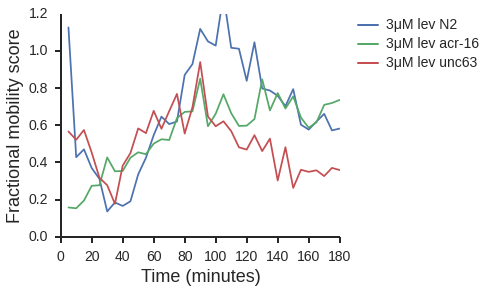

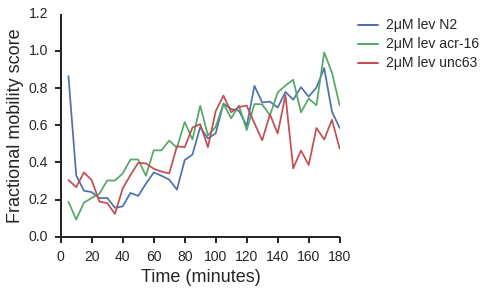

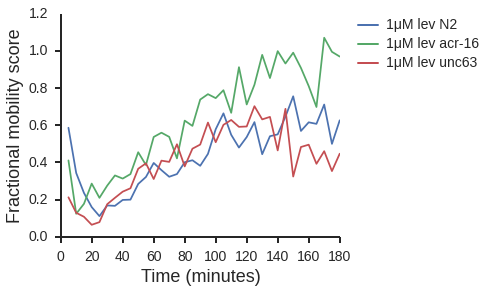

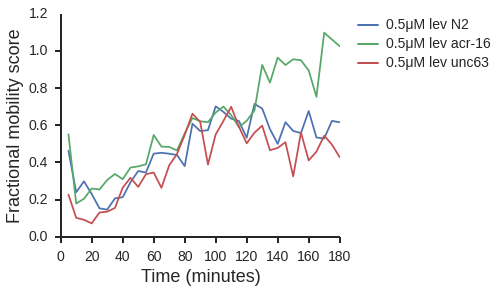

In [31]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['8', '4', '3','2','1','0.5', '0.25']

for i in [0,1,2,3,4,5]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
    ax.plot(times, N2_lev_norm[i,:], label = labels[i] + u'μM lev N2')
    ax.plot(times, A_lev_norm[i,:], label = labels[i] + u'μM lev acr-16')
    ax.plot(times, B_lev_norm[i,:], label = labels[i] + u'μM lev unc63')

   

    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()

In [33]:
infile = open('/home/mark/data/img/2015/13sep/lev1_lev_nic/lev1_lev_nic_13sep.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]


N2_lev_data = data[:,:3,:]
A_lev_data = data[:,3:6,:]
N2_nic_data = data[:,6:9,:]
A_nic_data = data[:,9:12,:]

N2_lev_norm = N2_lev_data[:,:,:].mean(axis=1)/N2_lev_data[7,:,:].mean(axis=0)
A_lev_norm = A_lev_data[:,:,:].mean(axis=1)/A_lev_data[7,:,:].mean(axis=0)
N2_nic_norm = N2_nic_data[:,:,:].mean(axis=1)/N2_nic_data[7,:,:].mean(axis=0)

A_nic_norm = A_nic_data[:,:,:].mean(axis=1)/A_nic_data[7,:,:].mean(axis=0)

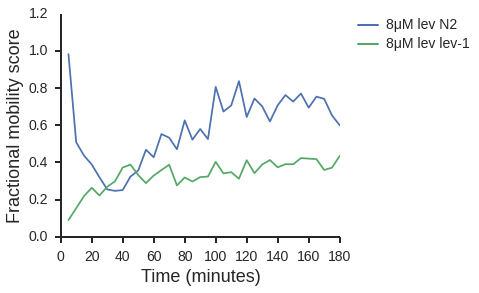

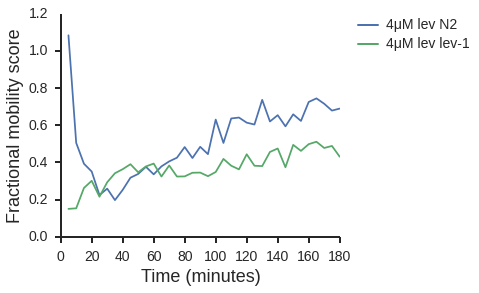

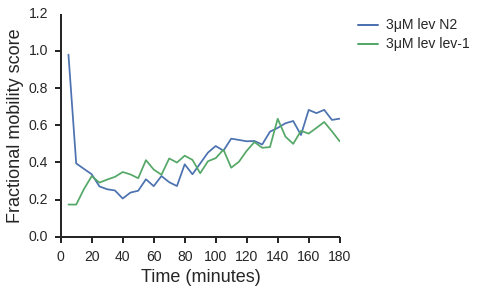

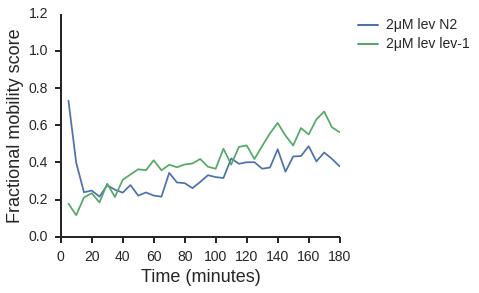

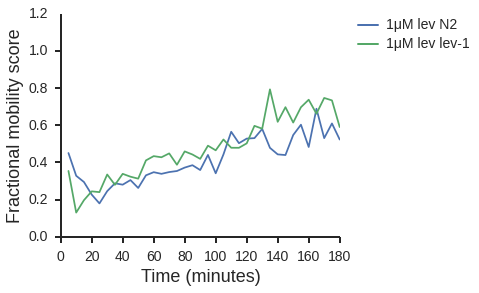

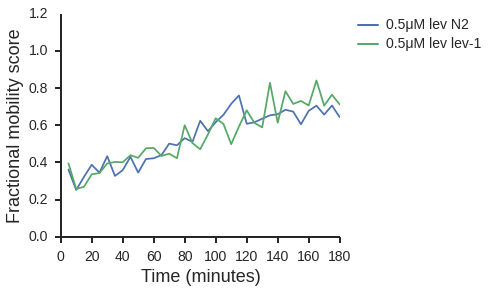

In [34]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['8', '4', '3','2','1','0.5', '0.25']

for i in [0,1,2,3,4,5]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
    ax.plot(times, N2_lev_norm[i,:], label = labels[i] + u'μM lev N2')
    ax.plot(times, A_lev_norm[i,:], label = labels[i] + u'μM lev lev-1')
    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()
    

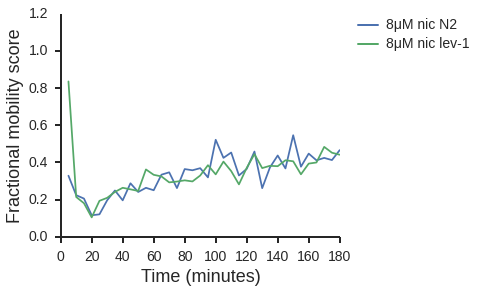

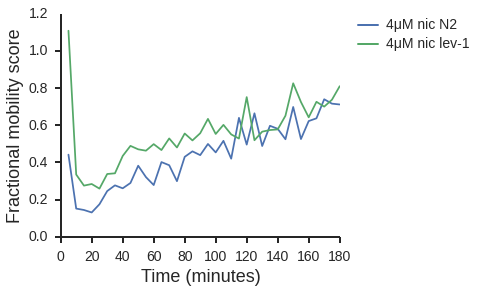

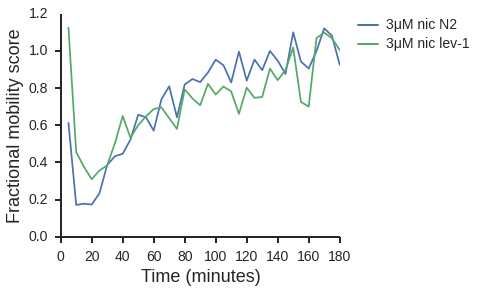

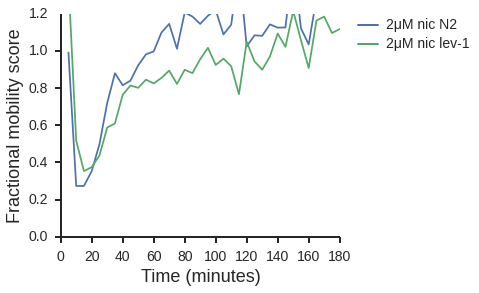

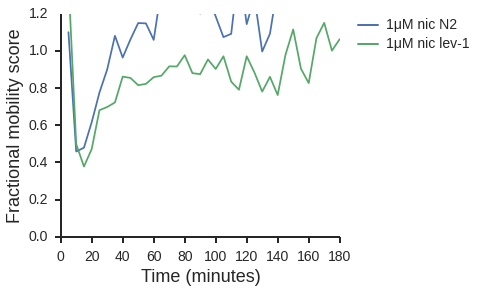

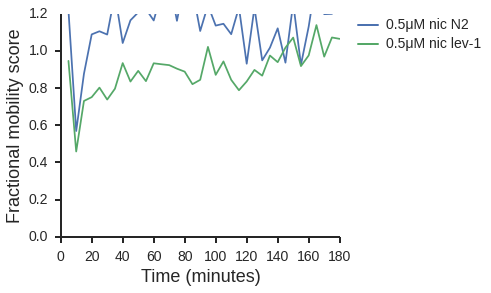

In [35]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['8', '4', '3','2','1','0.5', '0.25']

for i in [0,1,2,3,4,5]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
    ax.plot(times, N2_nic_norm[i,:], label = labels[i] + u'μM nic N2')
    ax.plot(times, A_nic_norm[i,:], label = labels[i] + u'μM nic lev-1')
    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()

In [36]:
infile = open('/home/mark/data/img/2015/13sep/unc63_unc38_lev/L1_unc63_unc38_lev.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]


N2_lev_data = data[:,:4,:]
A_lev_data = data[:,4:8,:]
B_lev_data = data[:,8:12,:]

N2_lev_norm = N2_lev_data[:,:,:].mean(axis=1)/N2_lev_data[7,:,:].mean(axis=0)
A_lev_norm = A_lev_data[:,:,:].mean(axis=1)/A_lev_data[7,:,:].mean(axis=0)
B_lev_norm = B_lev_data[:,:,:].mean(axis=1)/B_lev_data[7,:,:].mean(axis=0)

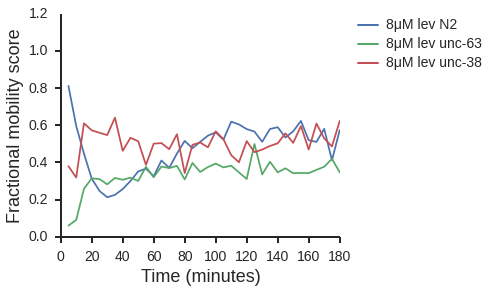

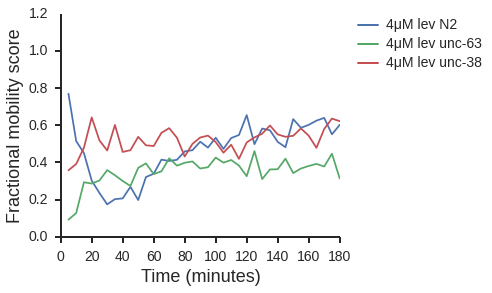

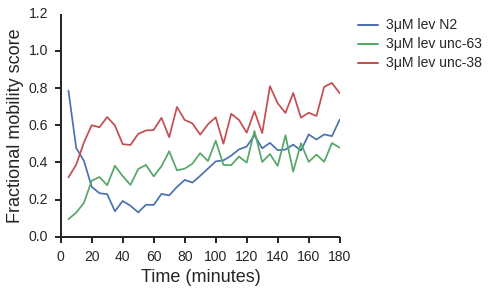

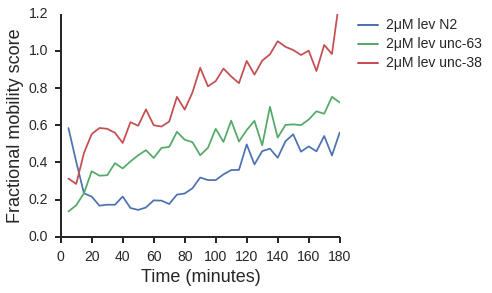

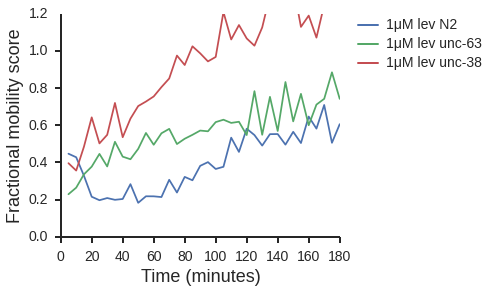

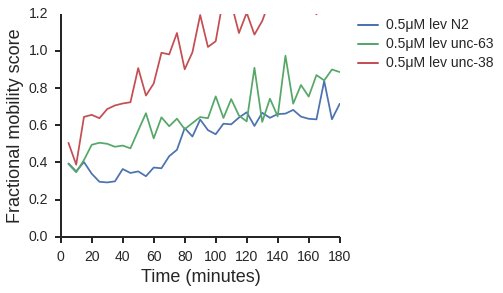

In [38]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['8', '4', '3','2','1','0.5', '0.25']

for i in [0,1,2,3,4,5]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
    ax.plot(times, N2_lev_norm[i,:], label = labels[i] + u'μM lev N2')
    ax.plot(times, A_lev_norm[i,:], label = labels[i] + u'μM lev unc-63')
    ax.plot(times, B_lev_norm[i,:], label = labels[i] + u'μM lev unc-38')

   

    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()

In [39]:
infile = open('/home/mark/data/img/2015/14sep/lev8_lev/L1_lev8_lev_14sep.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]


N2_lev_data = data[:,:6,:]
A_lev_data = data[:,6:,:]


N2_lev_norm = N2_lev_data[:,:,:].mean(axis=1)/N2_lev_data[7,:,:].mean(axis=0)
A_lev_norm = A_lev_data[:,:,:].mean(axis=1)/A_lev_data[7,:,:].mean(axis=0)


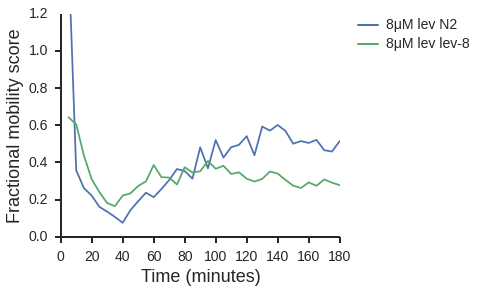

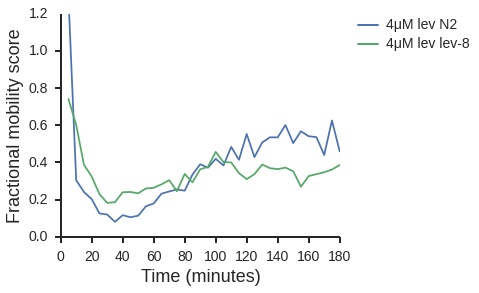

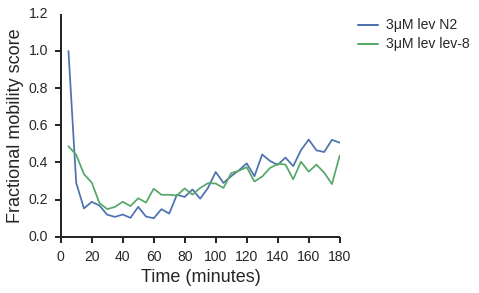

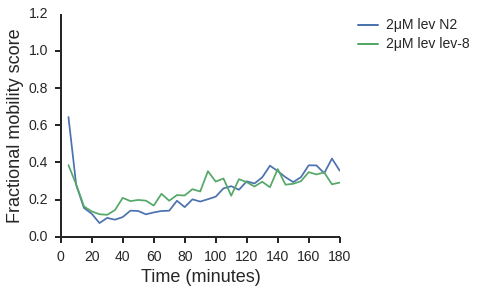

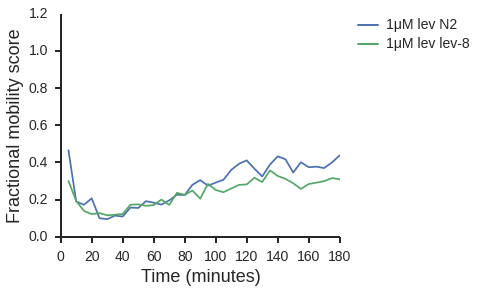

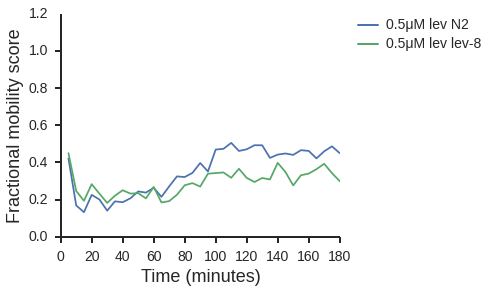

In [40]:
for i in [0,1,2,3,4,5]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
    ax.plot(times, N2_lev_norm[i,:], label = labels[i] + u'μM lev N2')
    ax.plot(times, A_lev_norm[i,:], label = labels[i] + u'μM lev lev-8')


   

    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()

In [41]:
infile = open('/home/mark/data/img/2015/14sep/unc29_lev/L1_unc29_lev_14sep.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]


N2_lev_data = data[:,:4,:]
A_lev_data = data[:,4:8,:]
B_lev_data = data[:,8:12,:]

N2_lev_norm = N2_lev_data[:,:,:].mean(axis=1)/N2_lev_data[7,:,:].mean(axis=0)
A_lev_norm = A_lev_data[:,:,:].mean(axis=1)/A_lev_data[7,:,:].mean(axis=0)
B_lev_norm = B_lev_data[:,:,:].mean(axis=1)/B_lev_data[7,:,:].mean(axis=0)

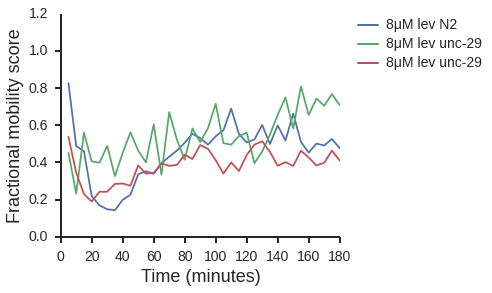

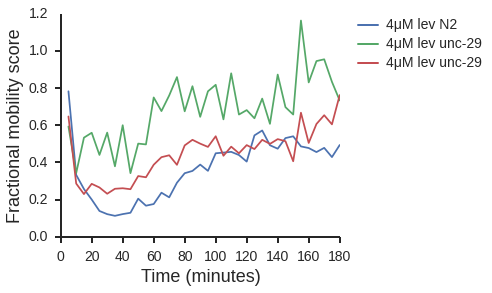

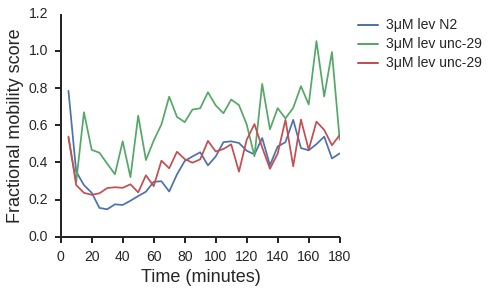

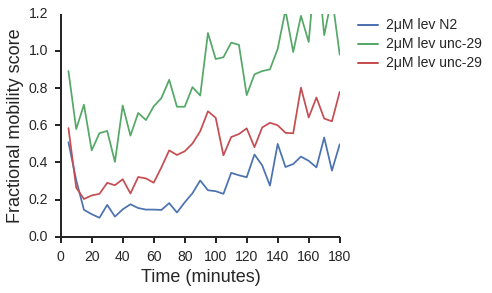

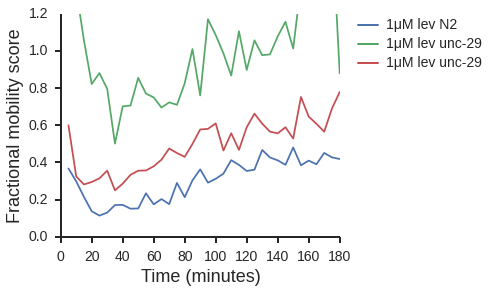

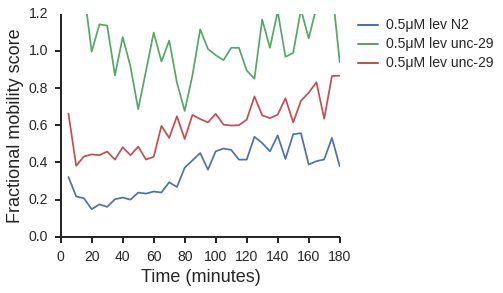

In [42]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['8', '4', '3','2','1','0.5', '0.25']

for i in [0,1,2,3,4,5]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
    ax.plot(times, N2_lev_norm[i,:], label = labels[i] + u'μM lev N2')
    ax.plot(times, A_lev_norm[i,:], label = labels[i] + u'μM lev unc-29')
    ax.plot(times, B_lev_norm[i,:], label = labels[i] + u'μM lev unc-29')

   

    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()

(8, 5, 36)
(8, 36)
(8,)
